## Cameron Roehlk
## ABE 516X

This notebook can be found on GitHub under isu-abe/516x/croehlk named Roehlk-KMeans-Task.ipynb

### k-Means Clustering

Tutorial based on https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

You've learned about PCA, an unsupervised machine learning model that works for dimensionality reduction. Today, we're going to learn about another class of unsupervised machine learning models: clustering algorithms. Clustering algorithms aim to an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering, which is implemented in ```sklearn.cluster.KMeans```.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

The k-means algorithm tries to identify a pre-(user)-defined number of clusters within an unlabeled multidimensional dataset. As shown in the Statquest video, it does this using optimal clustering:

"The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.
Those two assumptions are the basis of the k-means model."

Let's simluate a two-dimensional dataset containing four distinct blobs. Note that this is unlabeled data.

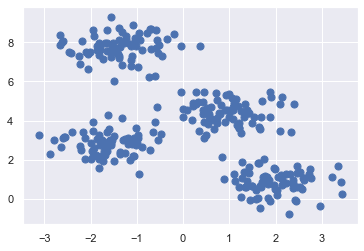

In [6]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

You can see some clear clusters, 4 blobs.  If we used our algorithm to detect these, we would run the following:

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [8]:
# this is the identification of the cluster
y_kmeans

array([2, 3, 1, 3, 2, 2, 0, 1, 3, 3, 0, 3, 1, 3, 2, 1, 1, 2, 0, 0, 2, 2,
       1, 0, 0, 1, 2, 1, 0, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 1, 0, 1, 1,
       0, 0, 3, 0, 3, 2, 0, 2, 3, 2, 2, 0, 3, 0, 3, 2, 3, 1, 3, 0, 0, 0,
       3, 2, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 2, 3, 2, 1, 2, 2, 3, 1, 2, 1,
       3, 3, 1, 2, 3, 0, 0, 1, 2, 2, 1, 0, 3, 2, 3, 2, 1, 2, 2, 1, 3, 1,
       0, 0, 2, 3, 2, 1, 3, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0,
       0, 2, 3, 0, 0, 3, 1, 3, 3, 0, 1, 0, 1, 0, 3, 1, 3, 3, 3, 1, 3, 1,
       2, 0, 3, 0, 2, 1, 3, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 3, 2, 1, 0, 3,
       2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 3, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 3, 1, 0, 2, 0, 1, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 0, 0, 2, 2, 1,
       3, 2, 2, 0, 2, 0, 1, 3, 3, 1, 1, 3, 1, 2, 0, 1, 2, 0, 3, 0, 2, 1,
       2, 3, 3, 3, 3, 0, 0, 3, 1, 0, 2, 1, 0, 0, 0, 2, 2, 3, 1, 1, 0, 2,
       3, 0, 1, 3, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 3, 3, 2, 2, 1, 2, 2, 2,
       3, 0, 3, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 0], d

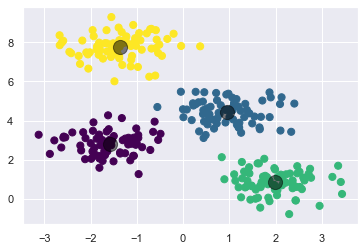

In [9]:
# plots the simulated dataset, colored by its cluster number
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The k-means algorithm in this case assigns points as you might expect.  Below is a manual implementation of the k-means algorithm,w here you can see that the while loop allows for guess-repeat steps to assign points to the nearest cluster.  Most implementations of the k-means algorithm have this at their core.

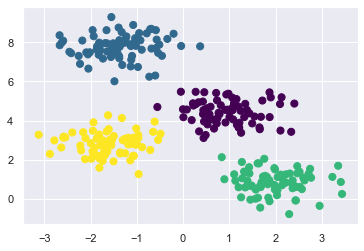

In [10]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Disadvantages of k-means:
    
* The global optimum may not be found if a local optimum ids identfied (especially if you start with bad guesses)


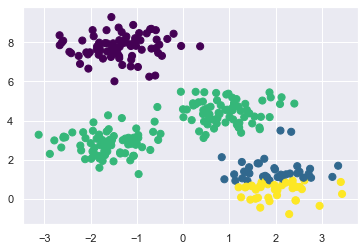

In [11]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

* You have to select the number of clusters beforehand

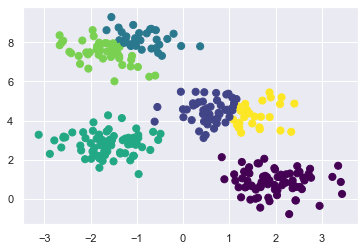

In [12]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

* k-means is limited to linear cluster boundaries

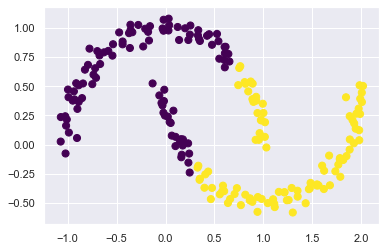

In [13]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

A solution may be to use a kernelized k-means implementation like the SpectralClustering estimator. It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

//anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


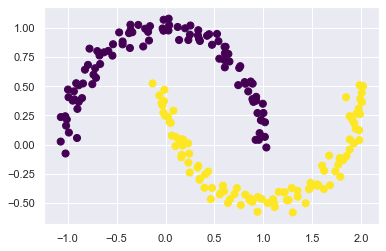

In [14]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Finally, k-means can be slow for extra large dataset.Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.

### K-means applications

This task is based directly on the examples from https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

Here we will attempt to use k-means to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

We will start by loading the digits and then finding the KMeans clusters. Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Let's visualize the first hundred of these:

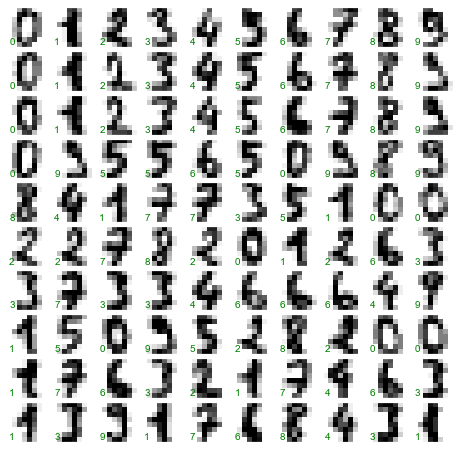

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [17]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.

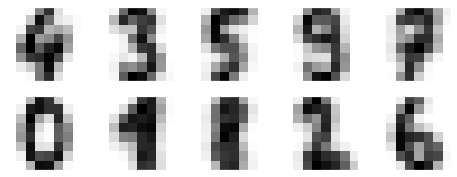

In [18]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [19]:
clusters

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

In [20]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] #Takes the mode of the true label

In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(digits.target, labels)

0.7935447968836951

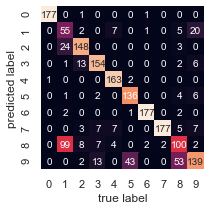

In [22]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(3,3))
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cbar=False, 
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Some fun optional applications:
* Image compression Example 2 in this tutorial: https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
* Stock market analysis:  https://www.quantstart.com/articles/k-means-clustering-of-daily-ohlc-bar-data

        
        
        